In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Import the three datasets

In [99]:
movies = pd.read_csv(r'movies.dat', sep = "::", names = ['MovieID', 'Title', 'Genres'], engine='python')

In [100]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [101]:
ratings = pd.read_csv(r'ratings.dat', sep = "::", names = ['UserID','MovieID', 'Rating', 'Timestamp'], engine='python')

In [102]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [103]:
users = pd.read_csv(r'users.dat', sep = "::", names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-Code'], engine='python')
users.head()

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [104]:
movies.shape, users.shape, ratings.shape

((3883, 3), (6040, 5), (1000209, 4))

# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [105]:
movie_ratings = pd.merge(movies, ratings, on = "MovieID")
display (movie_ratings.head())
display (movie_ratings.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


(1000209, 6)

In [106]:
users.head()

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [107]:
data = pd.merge(movie_ratings, users, on = "UserID")

display (data.head())
display (data.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


(1000209, 10)

# Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

### 1. User Age Distribution

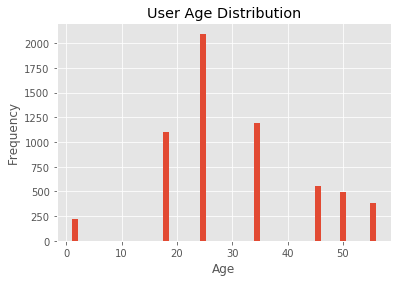

In [109]:
import matplotlib.pyplot as plt
from matplotlib.style import use
%matplotlib inline

# Visualize age distribution of users
users.Age.plot.hist(bins=50)
plt.style.use('ggplot')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.show()

# 2. User rating of the movie “Toy Story

In [110]:
# Extract movie data for movie Toy Story
df_movie_toy_story = data[data['MovieID'] == 1]

# View toy story first five records
df_movie_toy_story.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [111]:
df_movie_toy_story['Rating'].mean()

4.146846413095811

In [112]:
data.Rating[data['MovieID'] == 1].mean()

4.146846413095811

# 3. Top 25 movies by viewership rating

In [113]:
# Explore movie data for viewership by movie title
data_count = data['Title'].value_counts()
data_count[0:25]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [114]:
# Explore movie data for viewership by movie title
titlewise_mean = pd.DataFrame(data.groupby('Title')['Rating'].mean())
display (titlewise_mean.head())

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [115]:
titlewise_mean.sort_values('Rating', ascending=False).head(25)
top_25 = titlewise_mean.sort_values('Rating', ascending=False).head(25)
top_25

,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


# 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [116]:
data_of_2696 = data[data['UserID']==2696]
data_of_2696.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210


# Feature Engineering:
1. Use column genres: Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [117]:
data.Genres.head()

0             Animation|Children's|Comedy
1    Animation|Children's|Musical|Romance
2                                   Drama
3         Action|Adventure|Fantasy|Sci-Fi
4                               Drama|War
Name: Genres, dtype: object

In [118]:
data.Genres = data.Genres.str.split("|")
data.Genres[:3]

0              [Animation, Children's, Comedy]
1    [Animation, Children's, Musical, Romance]
2                                      [Drama]
Name: Genres, dtype: object

In [119]:
data.shape

(1000209, 10)

In [120]:
data5K = data[:5000]

In [121]:
x=[]
for rn in range(len(data5K)):
    x=x+data5K.Genres[rn]
 

In [122]:
unique_genres=list(set(x))
print(unique_genres)
print(len(unique_genres))

['Musical', 'Horror', 'Adventure', 'Animation', 'War', 'Action', 'Crime', "Children's", 'Fantasy', 'Romance', 'Film-Noir', 'Sci-Fi', 'Mystery', 'Comedy', 'Western', 'Documentary', 'Thriller', 'Drama']
18


#  2 Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [123]:
unique_genres=pd.Series(unique_genres)

In [124]:
df=pd.DataFrame()
for row in data5K.Genres:
    a=unique_genres.isin(row)
    df=df.append(a,ignore_index=True)
df[:5]    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
df.columns=unique_genres
df.head()

,Musical,Horror,Adventure,Animation,War,Action,Crime,Children's,Fantasy,Romance,Film-Noir,Sci-Fi,Mystery,Comedy,Western,Documentary,Thriller,Drama
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [126]:
data5K.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),[Drama],1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Fantasy, Sci-Fi]",1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),"[Drama, War]",1,5,978824195,F,1,10,48067


In [127]:
data5K=pd.concat((data5K,df),axis=1)

In [128]:
data5K.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code,...,Fantasy,Romance,Film-Noir,Sci-Fi,Mystery,Comedy,Western,Documentary,Thriller,Drama
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,F,1,10,48067,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,F,1,10,48067,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150,Apollo 13 (1995),[Drama],1,5,978301777,F,1,10,48067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Fantasy, Sci-Fi]",1,4,978300760,F,1,10,48067,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,527,Schindler's List (1993),"[Drama, War]",1,5,978824195,F,1,10,48067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [132]:
data5K = data[:5000]
data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),[Drama],1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Fantasy, Sci-Fi]",1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),"[Drama, War]",1,5,978824195,F,1,10,48067


# Determine the features affecting the ratings of any particular movie.

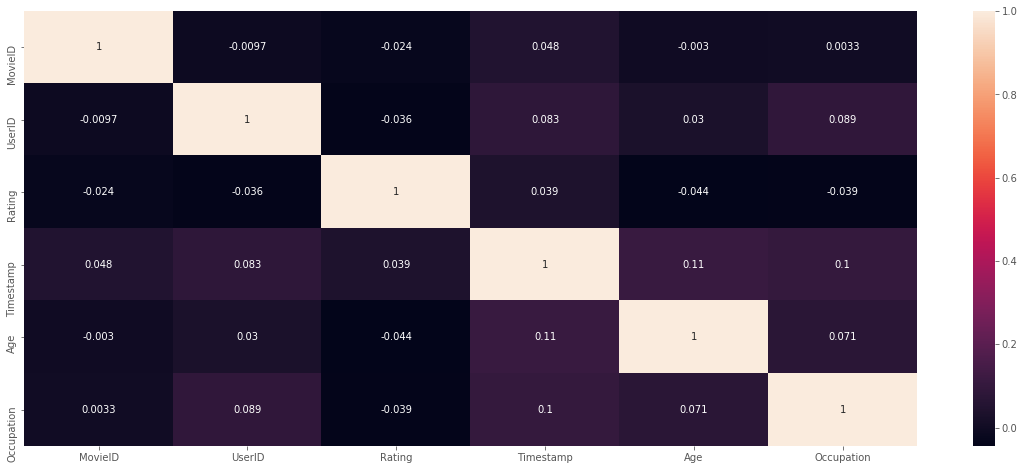

In [133]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,8))
corr=data5K.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})

# Develop an appropriate model to predict the movie ratings

In [135]:
# create a Python list of feature names
feature_cols = ['Age', 'Occupation']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Rating

# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.1153284258531615
